# Pedro Alves Gonçalves Júnior

https://archive.ics.uci.edu/ml/datasets/bank+marketing

### Informações do Conjunto de Dados
- Os dados estão relacionados com campanhas de marketing direto de uma instituição bancária portuguesa. As campanhas de marketing foram baseadas em chamadas telefônicas. Muitas vezes, era necessário mais de um contato para o mesmo cliente, a fim de acessar se o produto (empréstimo a prazo bancário) seria ('sim') ou não ('não') subscrito. 

### Objetivo
- O objetivo da **classificação** é prever se o cliente irá assinar (sim / não) um empréstimo a prazo (variável y).

### Informações dos Atributos
- Variáveis de entrada: 
    - ##### banco dados do cliente: 
    - 1 - **age:** (numérica)
    - 2 - **job:** tipo de trabalho (categórico: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown') 
    - 3 - **marital:** estado civil (categórico: 'divorced', 'married', 'single', 'unknown'. Nota: 'divorced' significa divorced ou widowed) 
    - 4 - **education:** (categórica: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', ' university.degree', 'unknown') 
    - 5 - **default:** possui crédito em default? (categórico: 'no', 'yes', 'unknown')
    - 6 - **housing:** tem empréstimo à habitação? (categórico: 'no', 'yes', 'unknown') 
    - 7 - **loan:** tem empréstimo pessoal? (categórico: 'no', 'yes', 'unknown')
    
    - #### relacionado com o último contato da campanha atual: 
    - 8 - **contact:** tipo de comunicação de contato (categórico: 'cellular', 'telephone') 
    - 9 - **month:** mês do último contato do ano (categórico: 'jan', 'feb', 'mar', ..., 'nov', 'dec') 
    - 10 - **day_of_week:** último dia de contato da semana (categórico:'mon', 'tue', 'wed', 'thu', 'fri') 
    - 11 - **duration:** duração do último contato, em segundos (numérico). Nota importante: este atributo afeta altamente a meta de saída (por exemplo, se a duração for = 0, então y = 'não'). No entanto, a duração não é conhecida antes de uma chamada ser realizada. Além disso, após o término da chamada, é obviamente conhecido. Portanto, essa entrada deve ser incluída apenas para fins de benchmark e deve ser descartada se a intenção for ter um modelo preditivo realista. 
    
    - #### outros atributos:
    - 12 - **campaign:** número de contatos realizados durante esta campanha e para este cliente (numérico, inclui o último contato) 
    - 13 - **pdays:** número de dias que passaram depois que o cliente foi contatado pela última vez de uma campanha anterior (numérico; 999 significa cliente não previamente contactado) 
    - 14 - **previous:** número de contactos realizados antes desta campanha e para este cliente (numérico) 
    - 15 - **poutcome:** resultado da campanha anterior de marketing (categórico: 'failure', 'noexistent', 'success') 
    
    - #### social e econômico atributos de contexto 
    - 16 - **emp.var.rate:** taxa de variação de emprego - indicador trimestral (numérico) 
    - 17 - **cons.price.idx:** índice de preços ao consumidor - indicador mensal (numérico) 
    - 18 - **cons.conf.idx:** índice de confiança do consumidor - indicador mensal (numérico) 
    - 19 - **euribor3m:** euribor 3 meses - indicador diário (numérico) 
    - 20 - **nr.employed:** número de empregados - indicador trimestral (numérico) 

    - #### Variável de saída (desejado target): 
    - 21 - **y** - o cliente assinou um empréstimo a prazo? (binário: 'yes', 'no')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics as mt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv('bank-additional-full.csv', sep=';', na_values=['nonexistent', 'unknown', 999])

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,NaN,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,NaN,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,NaN,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,NaN,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,NaN,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.isna().sum()

age                   0
job                 330
marital              80
education          1731
default            8597
housing             990
loan                990
contact               0
month                 0
day_of_week           0
duration              2
campaign              0
pdays             39673
previous              0
poutcome          35563
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64

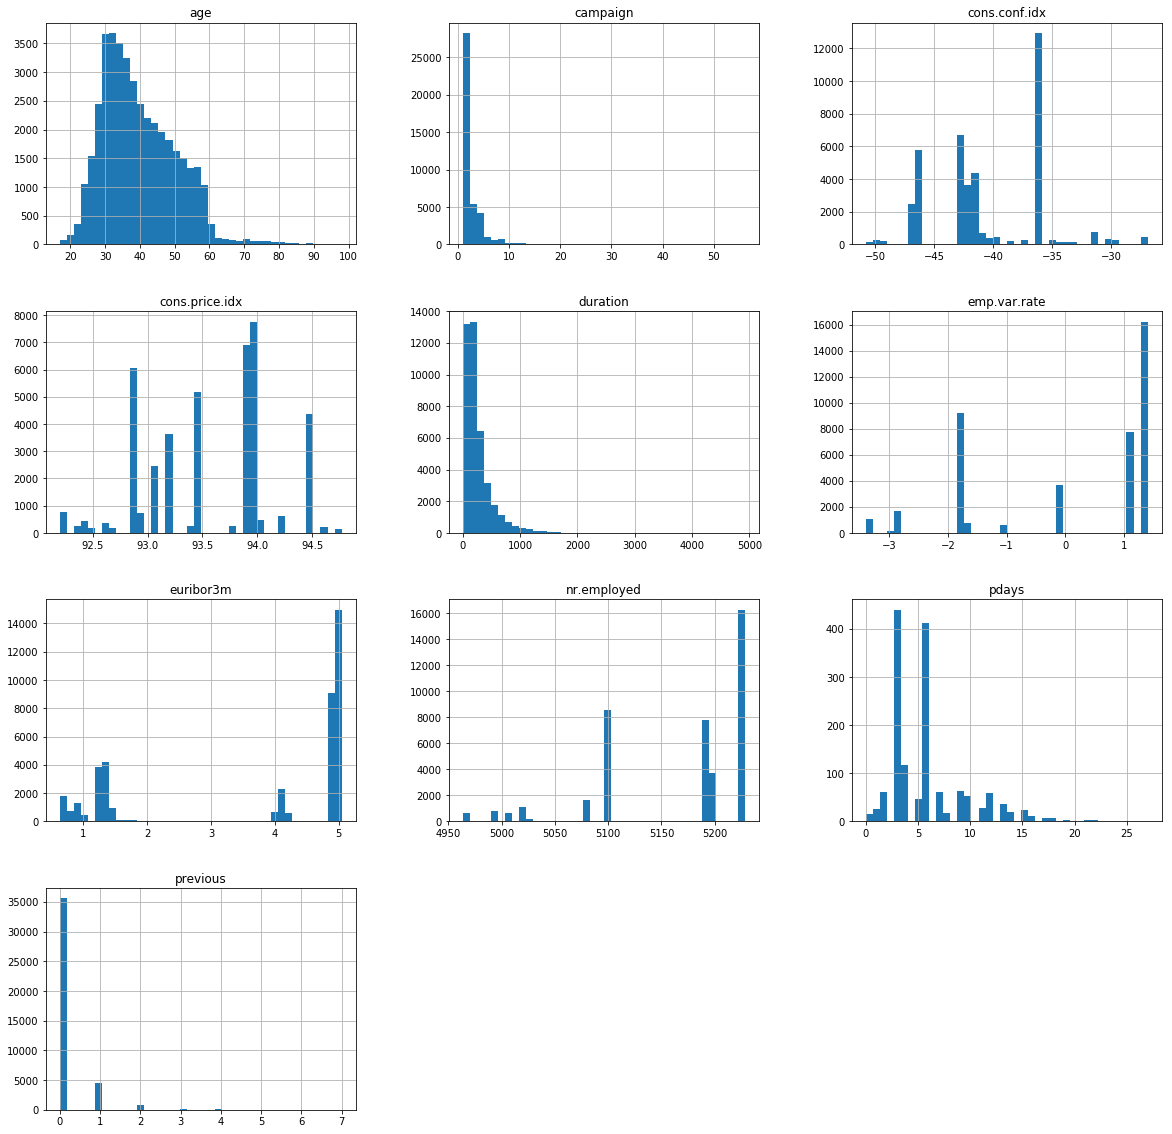

In [6]:
data.hist(bins=40, figsize=(20, 20));

In [7]:
data.corr().style.background_gradient(cmap='RdYlGn', axis=None)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1,-0.000832276,0.00459358,-0.069608,0.0243647,-0.000370685,0.000856715,0.129372,0.0107674,-0.0177251
duration,-0.000832276,1,-0.0717101,0.0768971,0.020693,-0.028077,0.0052222,-0.00820315,-0.0330066,-0.0447942
campaign,0.00459358,-0.0717101,1,0.0457519,-0.0791415,0.150754,0.127836,-0.0137331,0.135133,0.144095
pdays,-0.069608,0.0768971,0.0457519,1,-0.0400216,0.153113,0.17214,-0.0830464,-0.0815738,-0.13687
previous,0.0243647,0.020693,-0.0791415,-0.0400216,1,-0.420489,-0.20313,-0.0509364,-0.454494,-0.501333
emp.var.rate,-0.000370685,-0.028077,0.150754,0.153113,-0.420489,1,0.775334,0.196041,0.972245,0.90697
cons.price.idx,0.000856715,0.0052222,0.127836,0.17214,-0.20313,0.775334,1,0.0589862,0.68823,0.522034
cons.conf.idx,0.129372,-0.00820315,-0.0137331,-0.0830464,-0.0509364,0.196041,0.0589862,1,0.277686,0.100513
euribor3m,0.0107674,-0.0330066,0.135133,-0.0815738,-0.454494,0.972245,0.68823,0.277686,1,0.945154
nr.employed,-0.0177251,-0.0447942,0.144095,-0.13687,-0.501333,0.90697,0.522034,0.100513,0.945154,1


In [8]:
data.drop(['pdays', 'poutcome', 'duration'], axis=1, inplace=True)

In [9]:
impute = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [10]:
categoricos = ['job', 'marital', 'education', 'default', 'housing', 'loan']

In [11]:
data[categoricos] = impute.fit_transform(data[categoricos])

In [12]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [13]:
data['duration'] = imp_mean.fit_transform(data[['duration']])

In [14]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [15]:
data.education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'university.degree', 'illiterate'],
      dtype=object)

In [16]:
edu_map = {'illiterate':0, 'basic.4y':1, 'basic.6y':2, 'basic.9y':3, 'high.school':4, 'professional.course':5, 'university.degree':6}
data['education'] = data['education'].map(edu_map)

In [17]:
data = pd.get_dummies(data, drop_first=True)

In [18]:
data.corr().style.background_gradient(cmap='RdYlGn', axis=None)

In [19]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24712, 39), (16476, 39), (24712,), (16476,))

In [23]:
learning_rate = [0.1, 0.01, 0.001]
n_estimators = [50, 100, 200]
max_depth = [3, 5, 7]

models = {}
scores = {}

In [26]:
for lr in learning_rate:
    for ne in n_estimators:
        for md in max_depth:
            models[(lr, ne, md)] = GradientBoostingClassifier(learning_rate=lr, n_estimators=ne, max_depth=md, random_state=42)
            models[(lr, ne, md)].fit(X_train, y_train)
            scores[(lr, ne, md)] = models[(lr, ne, md)].score(X_test, y_test)

In [29]:
scores

{(0.1, 50, 3): 0.9131463947560088,
 (0.1, 50, 5): 0.9152100024277737,
 (0.1, 50, 7): 0.913814032532168,
 (0.1, 100, 3): 0.9142388929351785,
 (0.1, 100, 5): 0.9156348628307842,
 (0.1, 100, 7): 0.9142995872784656,
 (0.1, 200, 3): 0.9139961155620296,
 (0.1, 200, 5): 0.9137533381888808,
 (0.1, 200, 7): 0.9094440398154892,
 (0.01, 50, 3): 0.8873512988589464,
 (0.01, 50, 5): 0.8873512988589464,
 (0.01, 50, 7): 0.8873512988589464,
 (0.01, 100, 3): 0.8925103180383588,
 (0.01, 100, 5): 0.896091284292304,
 (0.01, 100, 7): 0.9010075260985676,
 (0.01, 200, 3): 0.9088977907259044,
 (0.01, 200, 5): 0.9119325078902646,
 (0.01, 200, 7): 0.9121752852634134,
 (0.001, 50, 3): 0.8873512988589464,
 (0.001, 50, 5): 0.8873512988589464,
 (0.001, 50, 7): 0.8873512988589464,
 (0.001, 100, 3): 0.8873512988589464,
 (0.001, 100, 5): 0.8873512988589464,
 (0.001, 100, 7): 0.8873512988589464,
 (0.001, 200, 3): 0.8873512988589464,
 (0.001, 200, 5): 0.8873512988589464,
 (0.001, 200, 7): 0.8873512988589464}

# Gradient Boosting

In [30]:
model_gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=5, random_state=42)
model_gb.fit(X_train, y_train)
model_gb.score(X_test, y_test)

0.9156348628307842

In [31]:
mt.recall_score(y_test, model_gb.predict(X_test))

0.5506465517241379

# Random Forest

In [32]:
model_rf = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
model_rf.fit(X_train, y_train)
model_rf.score(X_test, y_test)

0.9068948773974266

# Decision Tree

In [33]:
model_dt = DecisionTreeClassifier(max_depth=7, random_state=42)
model_dt.fit(X_train, y_train)
model_dt.score(X_test, y_test)

0.9090191794124788

In [34]:
scale = StandardScaler()
X_train_std = scale.fit_transform(X_train)
X_test_std = scale.transform(X_test)

# Gradient Boosting STD

In [35]:
model_gb_std = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=5, random_state=42)
model_gb_std.fit(X_train_std, y_train)
model_gb_std.score(X_test_std, y_test)

0.9156955571740714

# Random Forest STD

In [36]:
model_rf_std = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
model_rf_std.fit(X_train_std, y_train)
model_rf_std.score(X_test_std, y_test)

0.9068948773974266

# Decision Tree STD

In [37]:
model_dt_std = DecisionTreeClassifier(max_depth=7, random_state=42)
model_dt_std.fit(X_train_std, y_train)
model_dt_std.score(X_test_std, y_test)

0.9091405680990532

In [39]:
print(mt.classification_report(y_test, model_rf_std.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     14620
           1       0.00      0.00      0.00      1856

    accuracy                           0.89     16476
   macro avg       0.44      0.50      0.47     16476
weighted avg       0.79      0.89      0.83     16476

